# Лабораторна робота
## Прогнозування довжини тіла опосума

## 0. Імпорт бібліотек

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## 1. Завантаження та перегляд даних

In [15]:
df = pd.read_csv('possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


## 2. Попередня обробка даних

In [16]:
df.drop(columns=['case'], inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)
df['footlgth'].fillna(df['footlgth'].mean(), inplace=True)
df = pd.get_dummies(df, drop_first=True)
print(df.isnull().sum())

site         0
age          0
hdlngth      0
skullw       0
totlngth     0
taill        0
footlgth     0
earconch     0
eye          0
chest        0
belly        0
Pop_other    0
sex_m        0
dtype: int64


## 3. Візуалізація даних

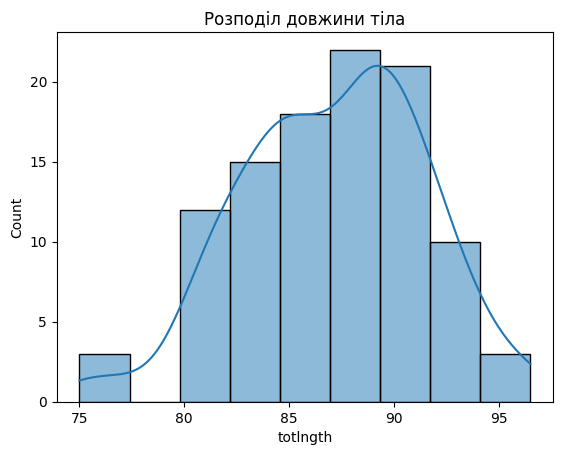

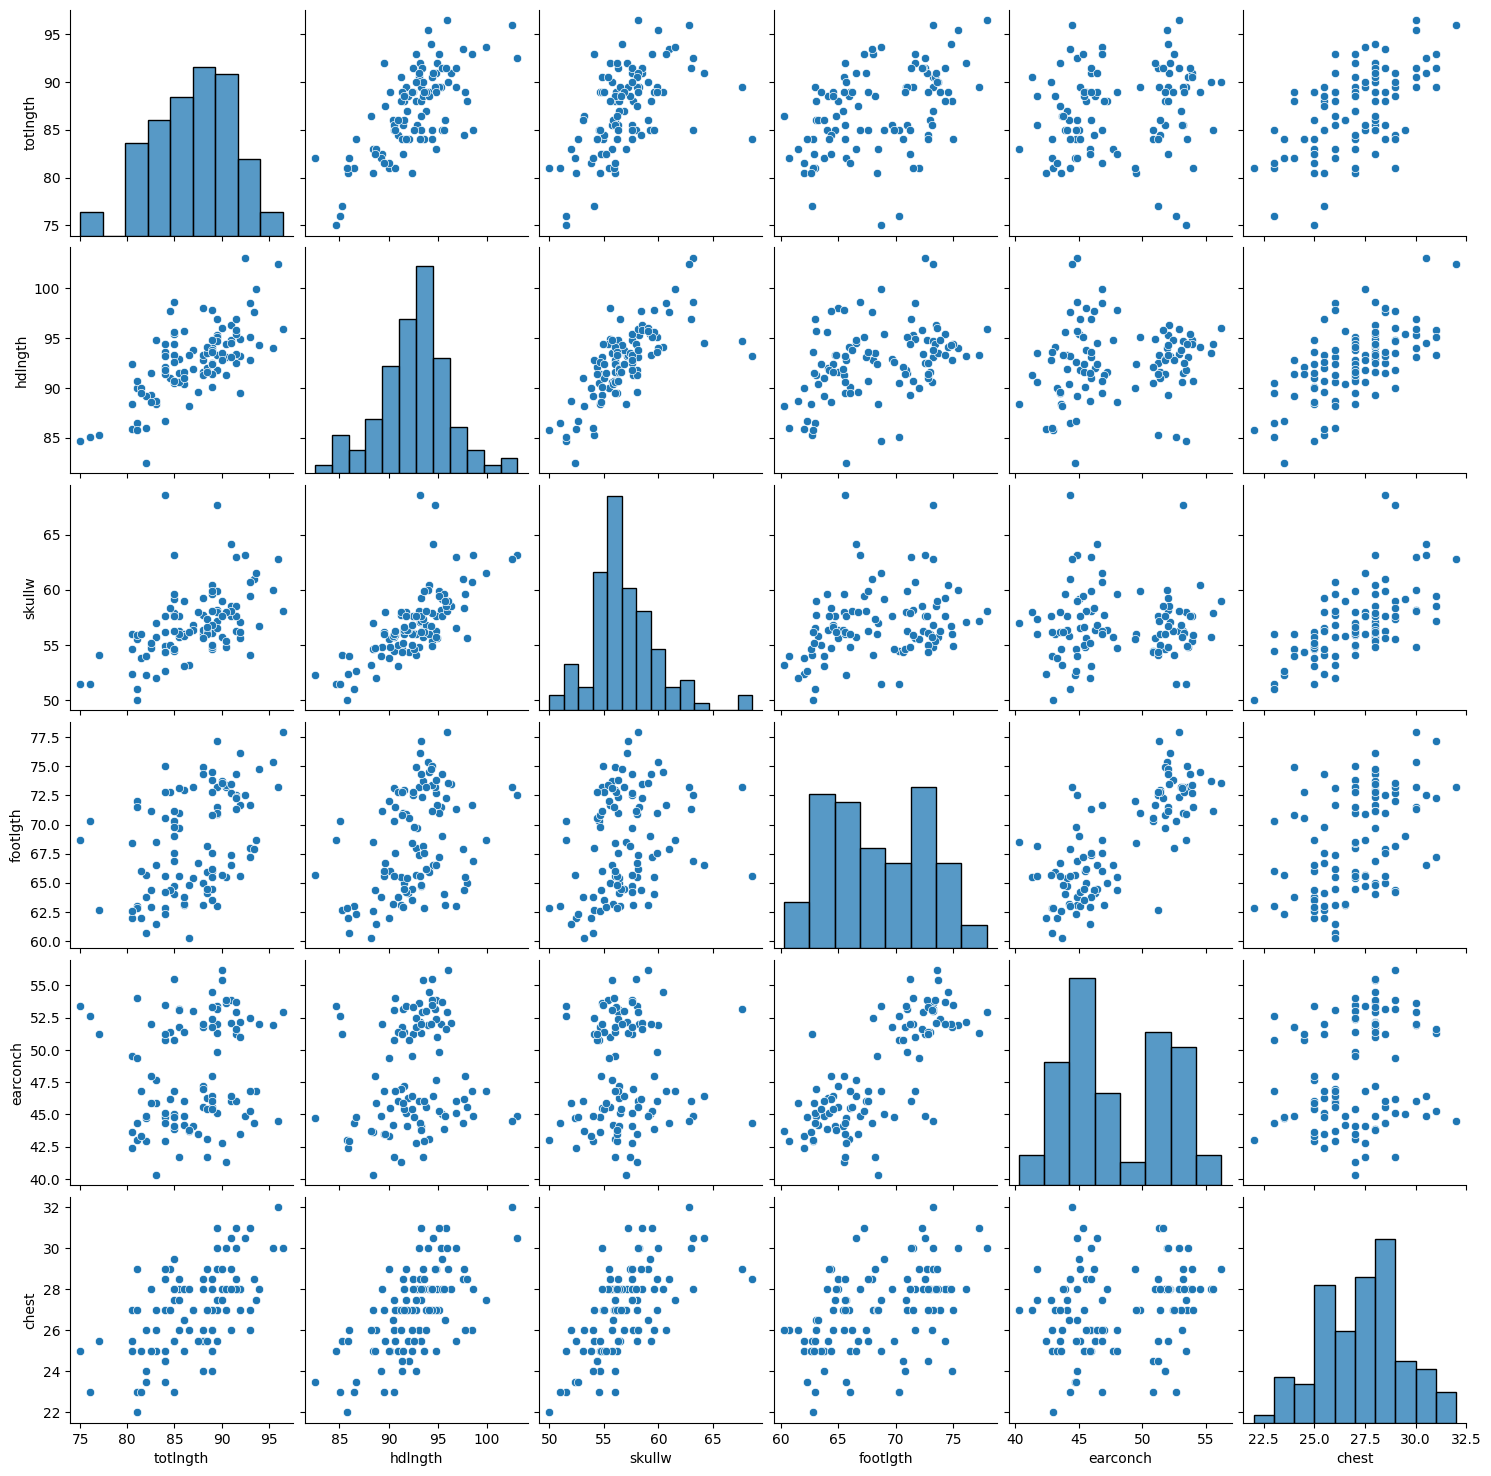

In [17]:
sns.histplot(df['totlngth'], kde=True)
plt.title('Розподіл довжини тіла')
plt.show()
sns.pairplot(df[['totlngth', 'hdlngth', 'skullw', 'footlgth', 'earconch', 'chest']])
plt.show()

## 4. Завершальна підготовка

In [18]:
X = df.drop(columns='totlngth')
y = df['totlngth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.1 Лінійна регресія

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression R²:', r2_score(y_test, y_pred_lr))

Linear Regression R²: 0.38759619420636626


## 5.2 Lasso-регресія

In [20]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print('Lasso Regression R²:', r2_score(y_test, y_pred_lasso))

Lasso Regression R²: 0.4346124298395385


## 5.3 Дерево рішень

In [21]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print('Decision Tree R²:', r2_score(y_test, y_pred_tree))

Decision Tree R²: -0.44975929529857606


## 5.4 Random Forest

In [22]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest R²:', r2_score(y_test, y_pred_rf))

Random Forest R²: 0.4140295554645087


## 5.5 Gradient Boosting

In [23]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print('Gradient Boosting R²:', r2_score(y_test, y_pred_gb))

Gradient Boosting R²: 0.34310829346785265


## 5.6 Support Vector Regression

In [24]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print('SVR R²:', r2_score(y_test, y_pred_svr))

SVR R²: -0.013555305952970054


## 5.7 Bayesian Ridge Regression

In [25]:
br = BayesianRidge()
br.fit(X_train, y_train)
y_pred_br = br.predict(X_test)
print('Bayesian Ridge R²:', r2_score(y_test, y_pred_br))

Bayesian Ridge R²: 0.4220199345360832


## 6. Linear Regression

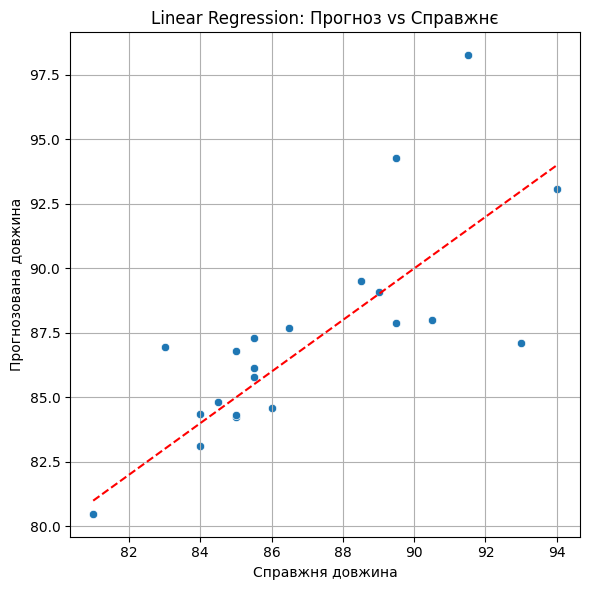

In [26]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel('Справжня довжина')
plt.ylabel('Прогнозована довжина')
plt.title('Linear Regression: Прогноз vs Справжнє')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()